In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn import datasets
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

%matplotlib inline

## Random Forest

In [17]:
train=pd.read_csv('TrainClean.csv',index_col=0).reset_index(drop=True)
X = train.drop(columns='NumberOfSales')
X = X.drop(columns='NumberOfCustomers')
y = train["NumberOfSales"]

In [18]:
forest = ExtraTreesRegressor(n_estimators=50, random_state=0)
forest.fit(X, y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

Feature ranking:
1. feature 2 NearestCompetitor (0.441450)
2. feature 1 HasPromotions (0.143109)
3. feature 8 Mean_Sea_Level_PressurehPa (0.030332)
4. feature 11 Mean_Wind_SpeedKm_h (0.025623)
5. feature 6 Mean_Dew_PointC (0.025449)
6. feature 9 Mean_TemperatureC (0.024800)
7. feature 7 Mean_Humidity (0.024758)
8. feature 10 Mean_VisibilityKm (0.024174)
9. feature 17 General (0.022189)
10. feature 23 Region3 (0.020803)
11. feature 41 December (0.019870)
12. feature 14 HyperMarket (0.013305)
13. feature 12 Precipitationmm (0.013037)
14. feature 3 Region_AreaKM2 (0.011805)
15. feature 16 ShoppingCenter (0.011791)
16. feature 13 StandardMarket (0.010219)
17. feature 5 Region_PopulationK (0.009614)
18. feature 15 SuperMarket (0.009603)
19. feature 4 Region_GDP (0.009547)
20. feature 29 Region9 (0.008110)
21. feature 27 Region7 (0.007125)
22. feature 46 Rain (0.006251)
23. feature 42 Fog (0.005751)
24. feature 28 Region8 (0.005625)
25. feature 26 Region6 (0.004873)
26. feature 19 WithNonFoo

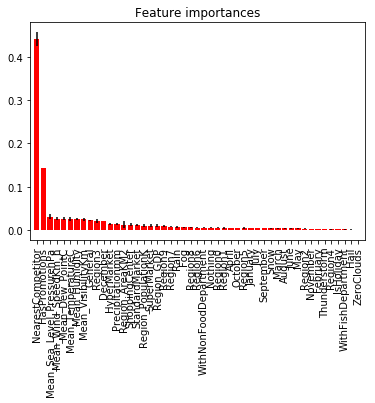

In [19]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [20]:
feature_selection_model = SelectFromModel(forest, prefit=True)

In [21]:
X_selected_features_forest = feature_selection_model.transform(X)
X_selected_features_forest.shape

(433958, 10)

In [24]:
X.columns[indices]

Index(['NearestCompetitor', 'HasPromotions', 'Mean_Sea_Level_PressurehPa',
       'Mean_Wind_SpeedKm_h', 'Mean_Dew_PointC', 'Mean_TemperatureC',
       'Mean_Humidity', 'Mean_VisibilityKm', 'General', 'Region3', 'December',
       'HyperMarket', 'Precipitationmm', 'Region_AreaKM2', 'ShoppingCenter',
       'StandardMarket', 'Region_PopulationK', 'SuperMarket', 'Region_GDP',
       'Region9', 'Region7', 'Rain', 'Fog', 'Region8', 'Region6',
       'WithNonFoodDepartment', 'Nothing', 'Region0', 'Region1', 'April',
       'October', 'Region5', 'January', 'July', 'September', 'Snow', 'March',
       'August', 'June', 'May', 'Region2', 'November', 'February',
       'Thunderstorm', 'Region4', 'IsHoliday', 'WithFishDepartment', 'Hail',
       'ZeroClouds'],
      dtype='object')